# Jenks natural breaks using 1-dimensional k-means clustering

In [1]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

from sklearn.cluster import KMeans

%matplotlib inline

plt.rcParams['figure.figsize'] = (10., 10.)
cmap = plt.cm.viridis

Create random numbers using gamma distribution

In [2]:
coeff = 0.954

random_numbers = gamma.rvs(coeff, size=90000)
random_numbers = np.reshape(random_numbers, (90000,1))

random_raster = np.reshape(random_numbers, (300, 300))

Determine colorbar breaks using equal intervals based on maximum random number value and number of classes

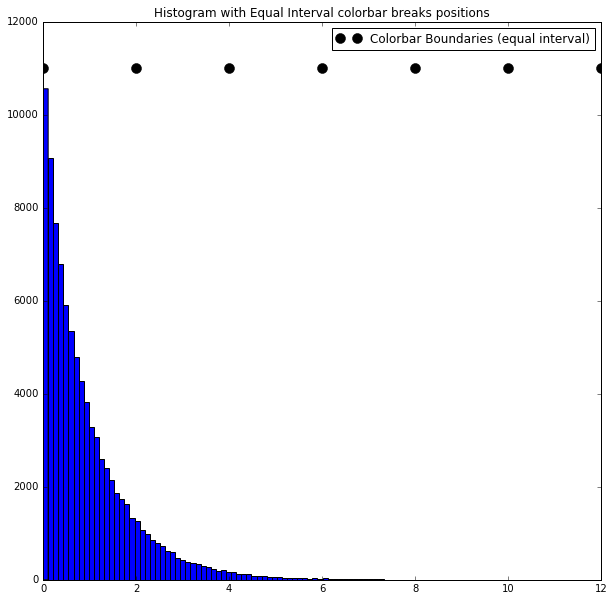

In [3]:
classes = MaxNLocator(nbins=6).tick_values(0, np.max(random_numbers))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

plt.hist(random_numbers, bins=100)
plt.plot(classes, [11000]*len(classes), "k.", markersize=20, label="Colorbar Boundaries (equal interval)")
plt.title("Histogram with Equal Interval colorbar breaks positions")

plt.legend()

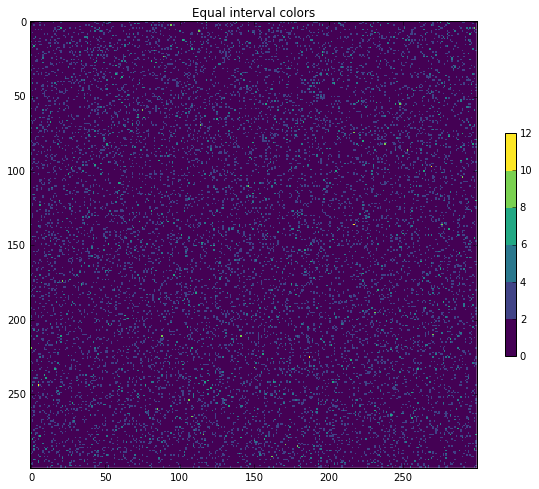

In [4]:
plt.imshow(random_raster, norm=norm, cmap=cmap, interpolation='none')
plt.title("Equal interval colors")
plt.colorbar(boundaries=classes, shrink=.4)

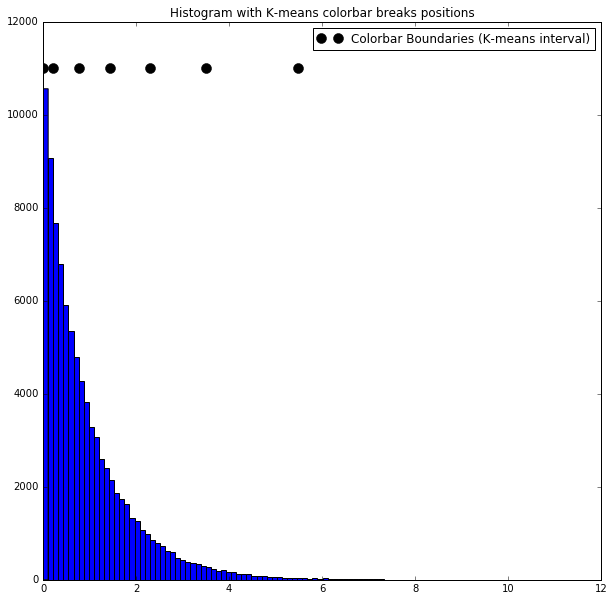

In [5]:
kmeans = KMeans(n_clusters=6)

classes = [0.0] + natsorted([x[0] for x in kmeans.fit(random_numbers).cluster_centers_])
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

plt.hist(random_numbers, bins=100)

plt.plot(classes, [11000]*len(classes), "k.", markersize=20, label="Colorbar Boundaries (K-means interval)")
plt.legend()
plt.title("Histogram with K-means colorbar breaks positions")

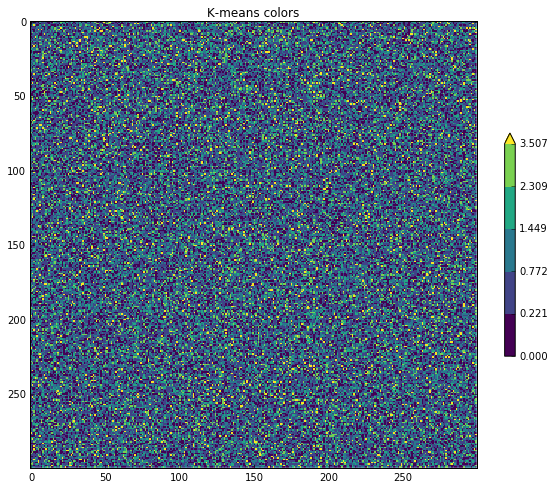

In [6]:
plt.imshow(random_raster, norm=norm, cmap=cmap, interpolation='none')
plt.title("K-means colors")
plt.colorbar(boundaries=classes, shrink=.4, extend='max')